https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example

We wanted to compare our neural network to an other one. We found a neural network with different layers. 

We can see the accuracy is better for the classification than the initial neural network. 

Import librairies 

In [ ]:
import sys
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import itertools  

Set the paths for training, testing and validation 

In [ ]:
path = "/ChihuahuaVSMuffin"
train_data_path = "/ChihuahuaVSMuffin/train"
test_data_path = "/ChihuahuaVSMuffin/test"
valid_data_path = "/ChihuahuaVSMuffin/validation"

Set image size and batch size 





In [ ]:
# Set image size and batch size


img_rows = 224

img_cols = 224

batch_size = 10



img_rows = 250
img_cols = 250
batch_size = 10




Set Data Generator for training, testing and validataion.

Note for testing, set shuffle = false (For proper Confusion matrix)






In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5)
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)


valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)


test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

Found 527 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


Function for plots images with labels within jupyter notebook




In [ ]:
def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
  
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')




Check the training set (with batch of 10 as defined above


In [ ]:
imgs, labels = next(train_generator)

Images are shown in the output

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


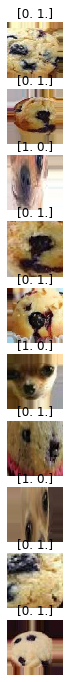

In [ ]:
plots(imgs, titles=labels)

Images Classes with index

In [ ]:
print(train_generator.class_indices)

{'Chihuahua': 0, 'Muffin': 1}


Model Creation / Sequential

In [ ]:
model = Sequential([Conv2D(128, (3, 3), activation='relu', 

                           input_shape=(img_rows, img_cols, 3)), 

                    Flatten(), 

                    Dense(2, activation='softmax')

                   ])

Get summary of the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 128)     3584      
_________________________________________________________________
flatten_1 (Flatten)          (None, 7872512)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 15745026  
Total params: 15,748,610
Trainable params: 15,748,610
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Train the model

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=20, validation_data=valid_generator, validation_steps=4, epochs=25)


Epoch 1/25
20/20 [==============================] - 19s 938ms/step - loss: 16768.4453 - accuracy: 0.5400 - val_loss: 656.8406 - val_accuracy: 0.7917
Epoch 2/25
20/20 [==============================] - 18s 887ms/step - loss: 524.2811 - accuracy: 0.8122
Epoch 3/25
20/20 [==============================] - 18s 909ms/step - loss: 119.4617 - accuracy: 0.8600
Epoch 4/25
20/20 [==============================] - 18s 901ms/step - loss: 66.3648 - accuracy: 0.7700
Epoch 5/25
20/20 [==============================] - 18s 894ms/step - loss: 30.3461 - accuracy: 0.8000
Epoch 6/25
20/20 [==============================] - 18s 901ms/step - loss: 19.8064 - accuracy: 0.7500
Epoch 7/25
20/20 [==============================] - 18s 888ms/step - loss: 20.8497 - accuracy: 0.8000
Epoch 8/25
20/20 [==============================] - 18s 896ms/step - loss: 13.8754 - accuracy: 0.7700
Epoch 9/25
20/20 [==============================] - 18s 876ms/step - loss: 43.7682 - accuracy: 0.7208
Epoch 10/25
20/20 [==============

Get the accuracy score

In [ ]:
test_score = model.evaluate_generator(test_generator, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

[INFO] accuracy: 82.76%
[INFO] Loss:  13.661291122436523


**Plot the Graph**


Loss Curves

Text(0.5, 1.0, 'Loss Curves')

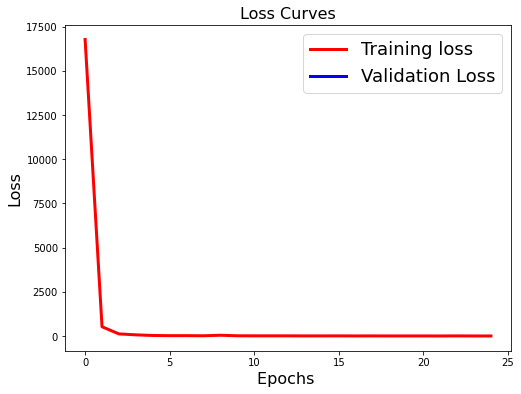

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Accuracy Curves

Text(0.5, 1.0, 'Accuracy Curves')

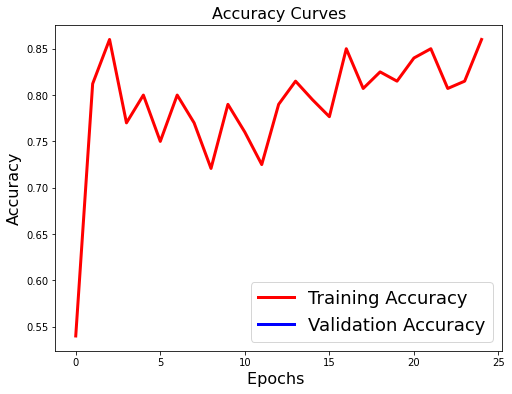

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Plot the confusion matrix. Set Normalize = True/False

Print the Target names

In [ ]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

Confution Matrix 

Confusion Matrix
Normalized confusion matrix


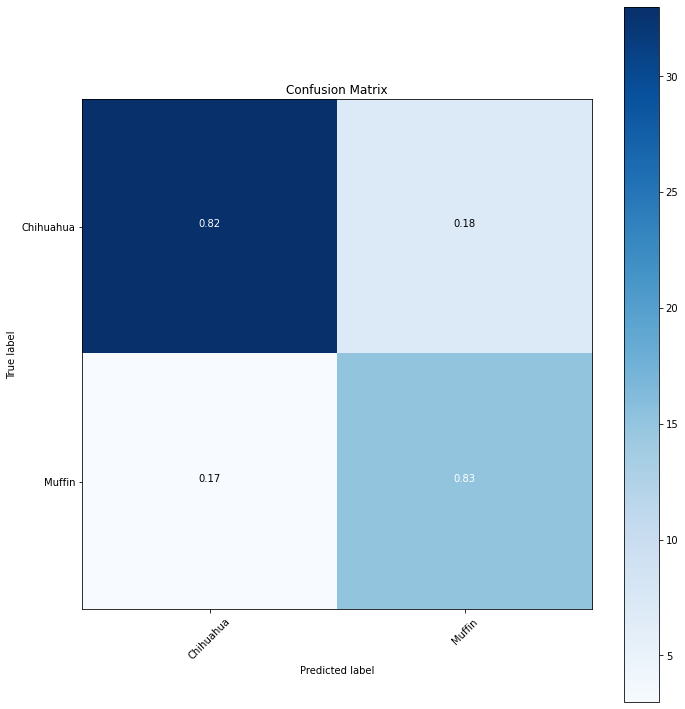

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

Print Classification Report

In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   Chihuahua       0.92      0.82      0.87        40
      Muffin       0.68      0.83      0.75        18

    accuracy                           0.83        58
   macro avg       0.80      0.83      0.81        58
weighted avg       0.84      0.83      0.83        58

